In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# **Завантаження попередньо підготовлених датасетів**

In [3]:
path_users = './data/Normalized_dataset_users.csv'
path_features = './data/Normalized_dataset_features.csv'
path_user_profiles = './data/User_Profiles.csv'
path_user_profiles_KMEANS = './data/User_Profiles_clusterized.csv'
path_user_profiles_Hierarchical = './data/User_Profiles_hierarchical_clusterized.csv'

In [4]:
path_matrix_zero = './data/filled_clustered/filled_kmeans_zero.csv'
path_matrix_one = './data/filled_clustered/filled_kmeans_one.csv'
path_matrix_two = './data/filled_clustered/filled_kmeans_two.csv'
path_matrix_three = './data/filled_clustered/filled_kmeans_three.csv'
path_matrix_four = './data/filled_clustered/filled_kmeans_four.csv'

In [5]:
df_users = pd.read_csv(path_users, on_bad_lines='skip')
df_users.shape

(9711301, 4)

In [6]:
df_features = pd.read_csv(path_features, on_bad_lines='skip')
df_features.shape

(50683, 18)

In [7]:
df_profiles = pd.read_csv(path_user_profiles, on_bad_lines='skip', index_col='Unnamed: 0')
df_profiles.shape

(1000, 12)

In [8]:
df_profiles.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
15e84b54990f6d0638cb16e131abbaa79327ac07,0.512835,0.50299,0.433688,0.780032,0.666667,0.050443,0.466619,0.217439,0.171092,0.396447,0.496756,0.780952


In [9]:
df_profiles_clustered_kmeans = pd.read_csv(path_user_profiles_KMEANS, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_kmeans.shape

(1000, 13)

In [10]:
df_profiles_clustered_kmeans.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_k_5
user_id,,,,,,,,,,,,,
d47d39bbe4e7f44ad477d56202a5ec5f65598b47,0.522068,0.704671,0.452583,0.835429,0.758993,0.077316,0.204944,0.079488,0.203509,0.505589,0.503605,0.782734,3


In [11]:
df_profiles_clustered_kmeans.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster']

In [12]:
df_profiles_clustered_kmeans.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

In [13]:
df_profiles_clustered_hierarchical = pd.read_csv(path_user_profiles_Hierarchical, on_bad_lines='skip', index_col='user_id')
df_profiles_clustered_hierarchical.shape

(1000, 13)

In [14]:
df_profiles_clustered_hierarchical.sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
user_id,,,,,,,,,,,,,
6785217a5ab0cfb8a5a26aa729561cf72b57062e,0.453323,0.636161,0.529781,0.800241,0.524904,0.068718,0.25723,0.389082,0.186246,0.389463,0.507009,0.763218,0


In [15]:
df_profiles_clustered_hierarchical.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'cluster'],
      dtype='object')

In [44]:
df_users = df_users.merge(df_profiles_clustered_kmeans['cluster'], left_on='user_id', right_index=True)

In [45]:
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster']

In [46]:
df_users = df_users.merge(df_profiles_clustered_hierarchical['cluster'], left_on='user_id', right_index=True)
df_users.columns = ['track_id', 'user_id', 'playcount', 'playcount_norm', 'kmeans_cluster', 'hierarchical_cluster']

In [16]:
df_filled_matrix_zero = pd.read_csv(path_matrix_zero, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_one = pd.read_csv(path_matrix_one, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_two = pd.read_csv(path_matrix_two, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_three = pd.read_csv(path_matrix_three, on_bad_lines='skip', index_col='user_id')
df_filled_matrix_four = pd.read_csv(path_matrix_four, on_bad_lines='skip', index_col='user_id')

In [17]:
df_filled_matrix_zero.columns.name = 'track_id'
df_filled_matrix_one.columns.name = 'track_id'
df_filled_matrix_two.columns.name = 'track_id'
df_filled_matrix_three.columns.name = 'track_id'
df_filled_matrix_four.columns.name = 'track_id'

In [18]:
clusters = {
    0: df_filled_matrix_zero,
    1: df_filled_matrix_one,
    2: df_filled_matrix_two,
    3: df_filled_matrix_three,
    4: df_filled_matrix_four
}

### **Оберемо випадкового користувача**

In [19]:
df_users.groupby('user_id').count().sort_values(by='track_id', ascending=False)

,track_id,playcount,playcount_norm
user_id,,,
ec6dfcf19485cb011e0b22637075037aae34cf26,784,784,784
4e11f45d732f4861772b2906f81a7d384552ad12,384,384,384
726da71c2c2ea119119a7957517fccd028d1be76,376,376,376
113255a012b2affeab62607563d03fbdf31b08e7,367,367,367
7adec7f006cb09482d36609d205293d8b61f030e,366,366,366
...,...,...,...
c736e87d6a5193662b776136067a7e104f970fbb,1,1,1
3d3750d24e0200ab74aee8f3a11f9c7778f22d4d,1,1,1
c737a8a65917262b5ff3289242f83929277554a1,1,1,1


Візьмемо користувача з id '726da71c2c2ea119119a7957517fccd028d1be76', оскільки він має багато даних про прослуховування.

In [21]:
random_user_id = '726da71c2c2ea119119a7957517fccd028d1be76'
random_user = df_profiles[df_profiles.index == random_user_id]
random_user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
726da71c2c2ea119119a7957517fccd028d1be76,0.534128,0.686606,0.484437,0.820491,0.711957,0.06595,0.207395,0.2059,0.200038,0.49707,0.522242,0.779348


In [22]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']

# **Без кластеризації**

# **Автоматизація процесу рекомендацій (базується на контенті)**

In [23]:
def get_content_based_recommendations(user_profile, tracks_df, features):
  def manhattan_distance(user_profile, track_row):
    user_profile = np.asarray(user_profile)
    track_row = np.asarray(track_row)
    return np.sum(np.abs(user_profile - track_row))

  df = tracks_df[features]
  return df.apply(lambda track: manhattan_distance(user_profile.iloc[0].astype(float), track.astype(float)), axis=1)

In [35]:
def get_features_of_content_based_recommended_tracks(user_profile, tracks_df, features, limit):
    recs = get_content_based_recommendations(user_profile, tracks_df, features)
    return pd.concat([df_features, recs.rename('distance')], axis=1).sort_values(by='distance').iloc[:limit]

# **Автоматизація процесу рекомендацій (колаборативна фільтрація)**

In [56]:
def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
    filtered_user_df = user_df[user_df['user_id'] == user_id]
    listened_tracks = filtered_user_df['track_id'].values

    user_matrix = user_track_matrix[user_track_matrix.index == user_id]
    not_zero_ratings = user_matrix.loc[:, (user_matrix != 0).all()]

    recommended_tracks = set(listened_tracks).symmetric_difference(not_zero_ratings.columns)
    filtered_user_row = not_zero_ratings[list(recommended_tracks)]
    top_recommendations = filtered_user_row.loc[:, filtered_user_row.loc[user_id].sort_values(ascending=False).head(limit).index]
    return top_recommendations

In [25]:
def get_features_of_recommended_tracks(recs, df_features):
    result = df_features.merge(recs.transpose(), on='track_id', how='inner')
    result.rename(columns={recs.index.values[0]: 'similarity'}, inplace=True)
    return result

# **Автоматизація процесу рекомендацій (гібрид)**

In [68]:
# def get_user_to_user_recommendations(user_track_matrix, user_df, user_id, limit):
# def get_features_of_recommended_tracks(recs, df_features):
# def get_content_based_recommendations(user_profile, tracks_df, features):
# get_features_of_content_based_recommended_tracks(user_profile, tracks_df, features, limit):

def get_recommendations(user_track_matrix_dict, user_profile, users_df, df_features, features, limit):
    user_id = user_profile.index[0]
    user_cluster = users_df[users_df['user_id'] == user_id]['kmeans_cluster'].values[0]
    user_track_matrix = user_track_matrix_dict[user_cluster]
    
    recs_collab = get_features_of_recommended_tracks(
        get_user_to_user_recommendations(
            user_track_matrix, users_df, user_id, limit
        ), df_features
    )

    recs_content_based = get_features_of_content_based_recommended_tracks(
        user_profile, df_features, features, limit
    )
    cb_weight = int(limit * 0.7)
    col_weight = limit - cb_weight
    
    merged_df = pd.concat([recs_content_based.iloc[:cb_weight], recs_collab.iloc[:col_weight]], axis=0, ignore_index=True)
    return merged_df.sample(frac=1)

In [69]:
hyb_recommendations = get_recommendations(
    user_track_matrix_dict=clusters,
    user_profile=random_user,
    users_df=df_users,
    df_features=df_features,
    features=features,
    limit=20
)

# **Вимірювання точності**

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [71]:
def simmilarity(user_profile, list_of_recs, features):
  recs = []
  df = list_of_recs[features]
  for col in df.columns:
    recs.append(df[col].median())
  return {
      'mae': mean_absolute_error(y_true=user_profile.T.values, y_pred=recs),
      'mse': mean_squared_error(y_true=user_profile.T.values, y_pred=recs),
      'rmse': root_mean_squared_error(y_true=user_profile.T.values, y_pred=recs)
  }

In [73]:
error_measures = (simmilarity(random_user, hyb_recommendations, features))

In [74]:
error_measures

{'mae': 0.050752743705712096,
 'mse': 0.008581838939514422,
 'rmse': 0.0926382153299297}

In [76]:
def plot_user_recommendation(recommendations:pd.DataFrame, features:list, user_profile:pd.DataFrame):
  num_features = len(features)

  angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False)
  angles = np.append(angles, angles[0])

  values_rs = user_profile[features].values.flatten()
  values_rs = np.append(values_rs, values_rs[0])

  rows = recommendations.shape[0] // 5
  fig, axs = plt.subplots(rows, 5, figsize=(25, 10 * (rows // 2)), subplot_kw={'projection': 'polar'}, layout='constrained')
  fig.suptitle(f'Visualization of User Recommendations (hybrid)', fontsize=16, fontweight='bold')

  for i, (index, rec) in enumerate(recommendations.iterrows()):
      row = i // 5
      col = i % 5

      values = rec[features].values
      values = np.append(values, values[0])

      ax = axs[row, col]
      ax.fill(angles, values, color='maroon', alpha=0.25)
      ax.plot(angles, values, color='maroon', linewidth=2)
      ax.fill(angles, values_rs, color='yellow', alpha=0.1)
      ax.plot(angles, values_rs, color='yellow', linewidth=2)
      ax.set_xticks(angles[:-1])
      ax.set_xticklabels(features, fontsize=8)
      ax.set_yticklabels([])
      ax.set_title(f'{rec["name"]}\nby {rec["artist"]}',size='medium', fontweight='bold')

  plt.show()

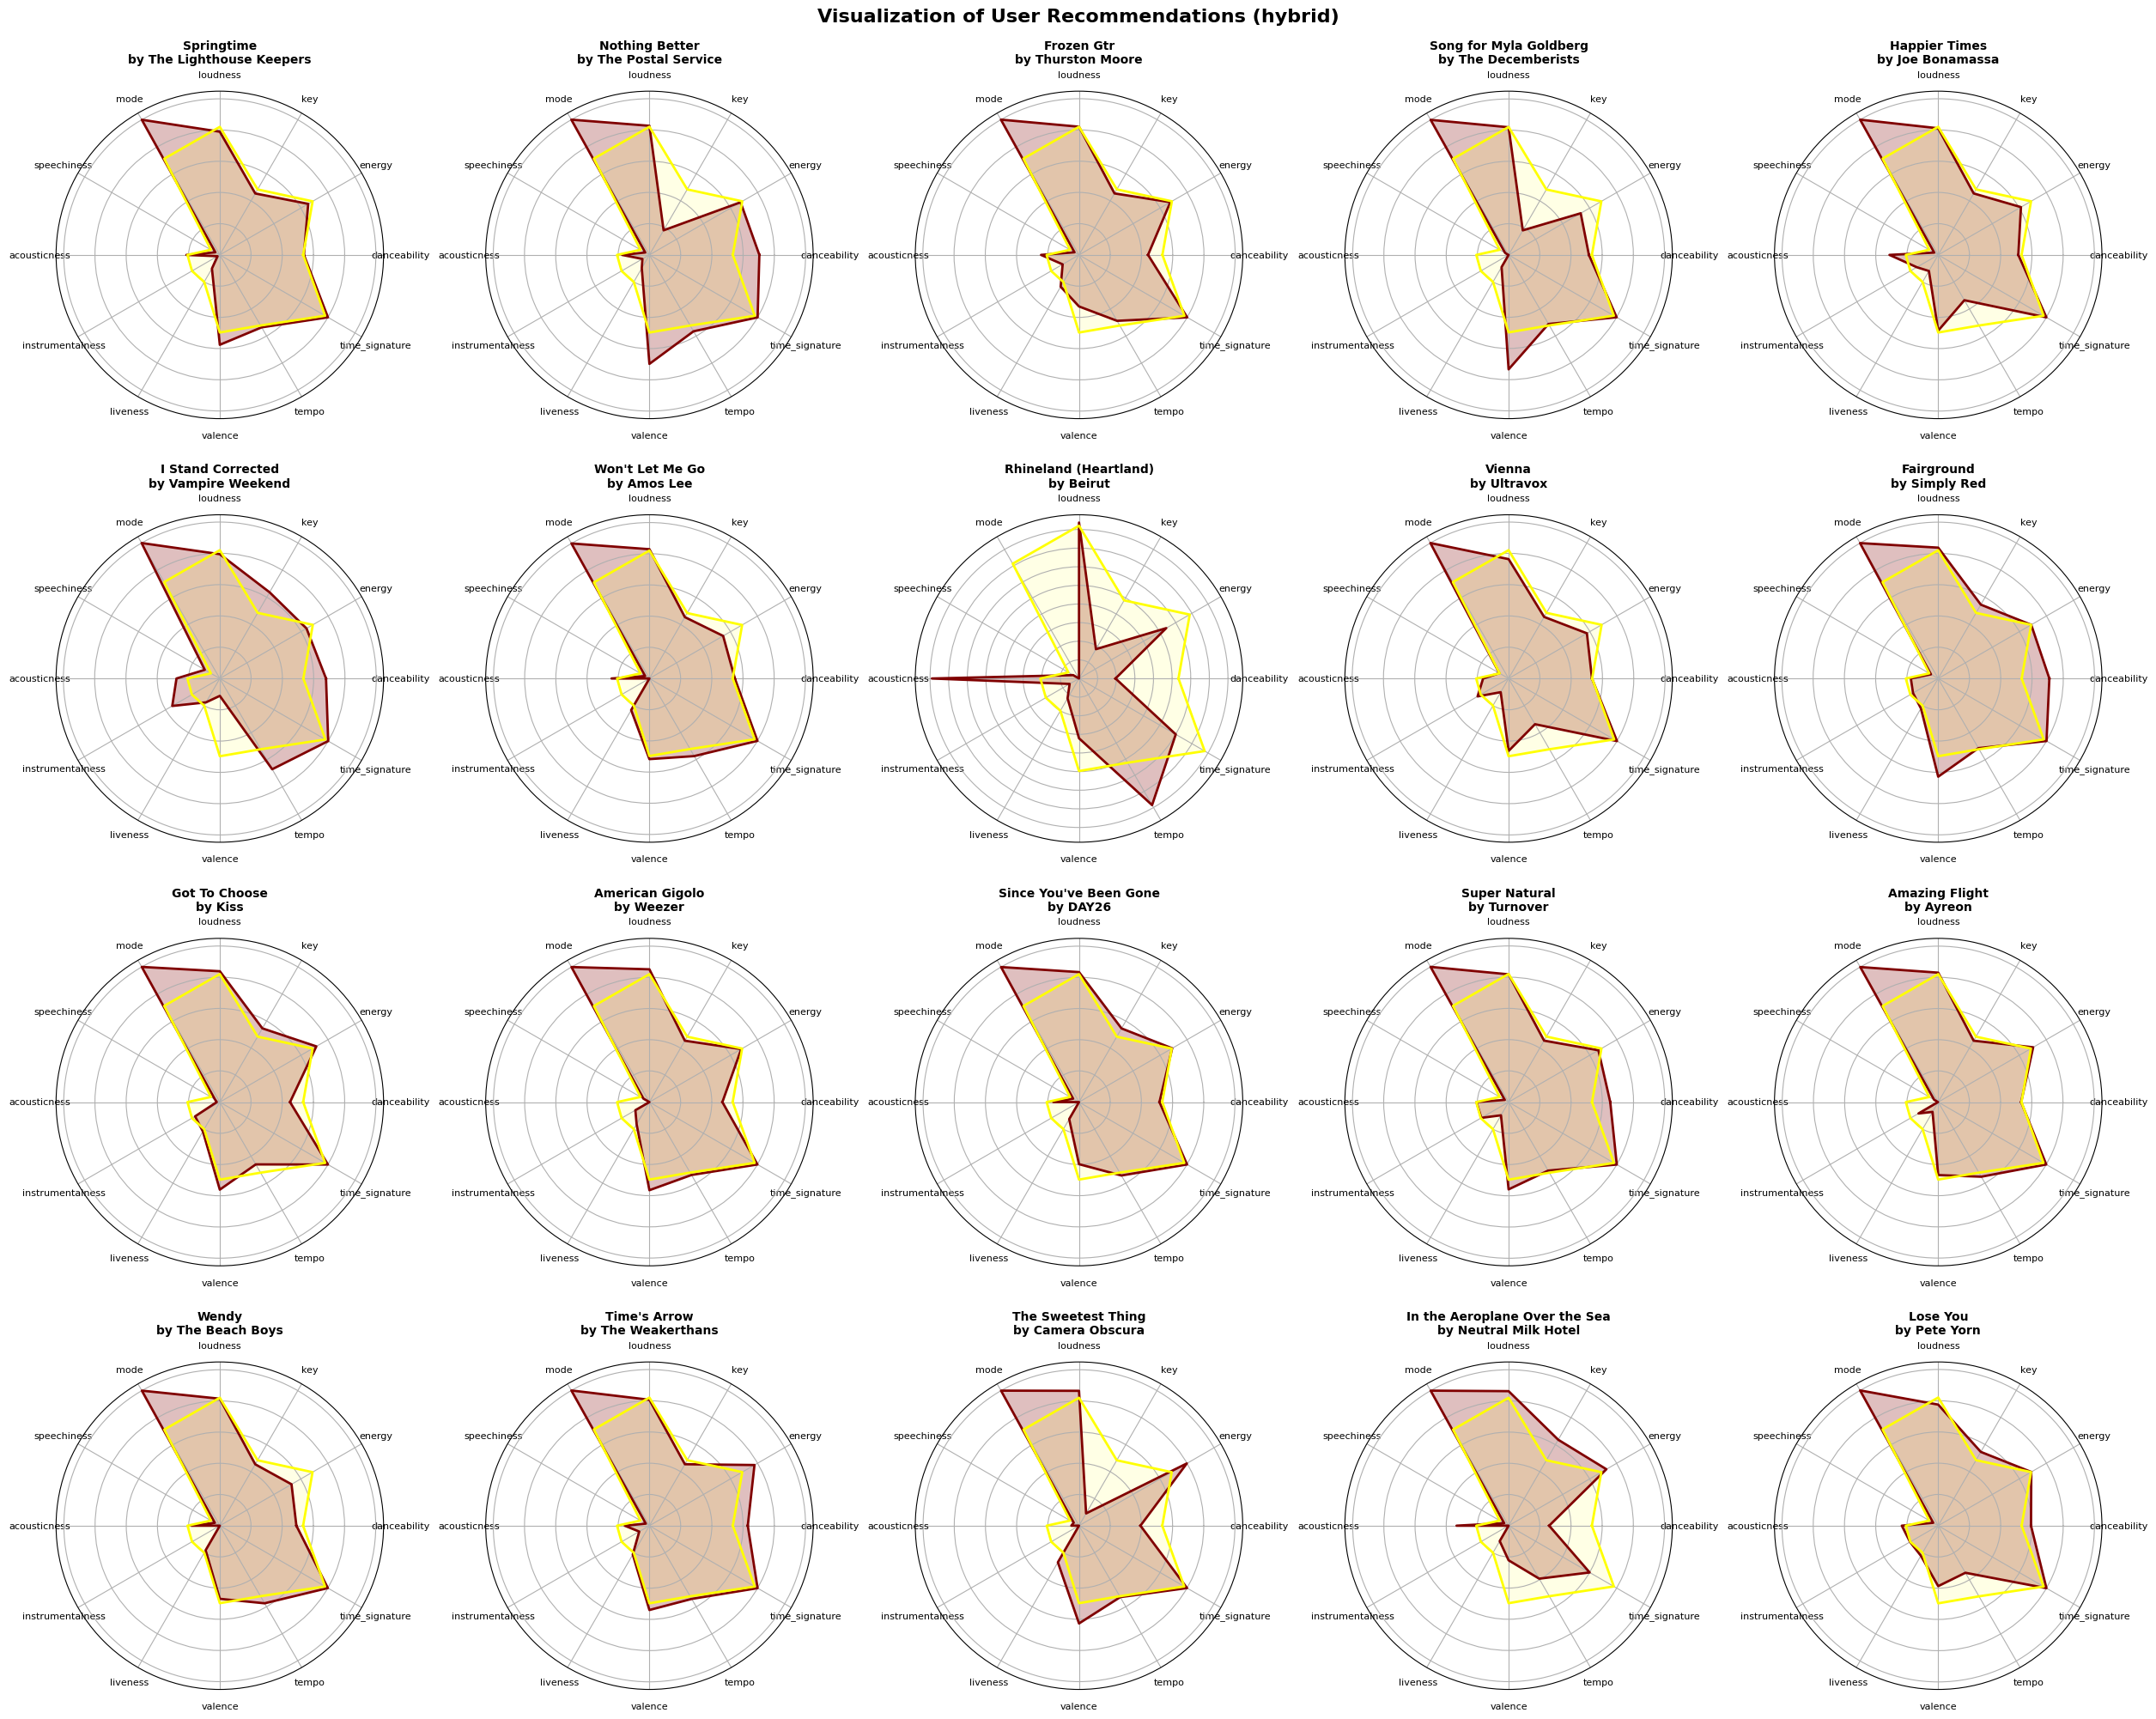

In [77]:
plot_user_recommendation(
    recommendations=hyb_recommendations,
    features=features,
    user_profile=random_user
)